In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Importing data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/RishikeshGovind/gamma_radiation_detection/main/telescope_data.csv")
data.head()                 

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
#dropping 'unnamed column'
data.drop(['Unnamed: 0'],axis=1, inplace=True)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [5]:
data.shape


(19020, 11)

In [6]:
#checking for unique values in class
for i in ['class']:
    print("Levels for catgeory '{0}': {1}".format(i, data[i].unique()))

Levels for catgeory 'class': ['g' 'h']


In [7]:
#mapping the values
data['class']=data['class'].map({'g':0,'h':1})

In [8]:
X = data.loc[:,'fLength':'fDist']
y = data['class']

In [9]:
X1=X.values
X1

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

In [10]:
##Pre-processing of data (Standardizing)
from sklearn.preprocessing import StandardScaler
#create the object
scaler=StandardScaler()
scaler.fit(X1)
X_scaled=scaler.transform(X1)

In [11]:
print('Mean of each variable:')
print(scaler.mean_)
print('\nStd of each variable:')
print(scaler.scale_)

Mean of each variable:
[ 53.25015393  22.18096622   2.82501696   0.38032707   0.21465713
  -4.33174516  10.54554482   0.24972596  27.64570668 193.81802647]

Std of each variable:
[42.36374124 18.34557401  0.47258622  0.18280834  0.11050789 59.20450555
 50.9987773  20.82689143 26.10293429 74.72982238]


In [12]:
# Model Selection
from sklearn.decomposition import PCA

pca = PCA() # creates an instance of PCA class
results = pca.fit(X_scaled) # applies PCA on predictor variables
pca_all = results.transform(X_scaled) # create a new array of latent variables

In [13]:
print('VAriance explained by all 11 components=',sum(pca.explained_variance_ratio_*100))

VAriance explained by all 11 components= 100.0


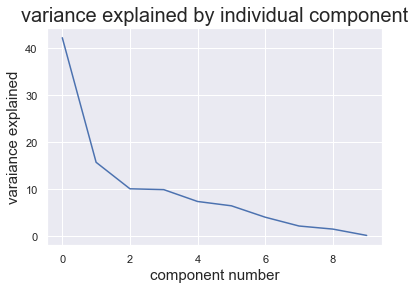

In [28]:

plt.plot(results.explained_variance_ratio_*100)# scree plot
plt.xlabel('component number',fontsize=15)
plt.ylabel('varaiance explained',fontsize=15)
plt.title('variance explained by individual component', fontsize=20)
plt.show()

**The first component alone captures about 45% of the variability in the dataset and the second component alone captures about 10% of the variability in the dataset **

Text(0.5, 1.0, 'cummulative variance explained by components')

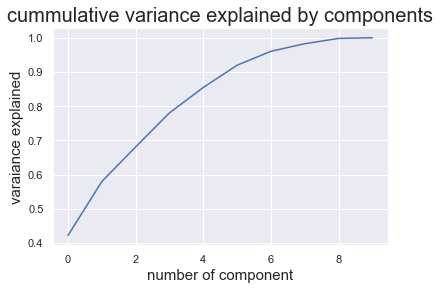

In [29]:
plt.plot(np.cumsum(results.explained_variance_ratio_))
plt.xlabel('number of component',fontsize=15)
plt.ylabel('varaiance explained',fontsize=15)
plt.title('cummulative variance explained by components', fontsize=20)

In [16]:
print('variance explained by First principal component=',np.cumsum(results.explained_variance_ratio_*100)[0])
print('variance explained by First 2 principal component=',np.cumsum(results.explained_variance_ratio_*100)[1])
print('variance explained by First 5 principal component=',np.cumsum(results.explained_variance_ratio_*100)[4])
print('variance explained by First 8 principal component=',np.cumsum(results.explained_variance_ratio_*100)[7])

variance explained by First principal component= 42.23990899412472
variance explained by First 2 principal component= 57.991788010770804
variance explained by First 5 principal component= 85.47016212586696
variance explained by First 8 principal component= 98.25003704471769


In [17]:
pd.DataFrame(results.components_)

,0,1,2,3,4,5,6,7,8,9
0,0.408277,0.395057,0.448922,-0.441612,-0.429238,-0.144688,0.005198,0.012352,-0.097175,0.256681
1,0.225699,0.245282,-0.093311,0.188376,0.195952,-0.486903,-0.599591,0.031477,0.456704,-0.012468
2,0.000501,0.152718,0.070601,-0.128920,-0.139198,0.377273,0.058326,0.602870,0.469919,-0.453523
3,0.025336,0.094621,0.057495,-0.108618,-0.116314,0.213917,0.053514,-0.794686,0.386270,-0.363894
4,0.119474,0.057897,0.015923,0.180670,0.205565,-0.022737,0.598664,0.008118,0.525793,0.521326
5,0.014990,0.168904,0.027642,0.104312,0.115773,0.721816,-0.459923,-0.056792,-0.003006,0.458711
6,0.437462,0.495342,0.001072,0.330737,0.389074,0.113592,0.233845,-0.014324,-0.364958,-0.318608
7,0.753225,-0.539479,-0.321599,-0.071913,-0.105167,0.139312,-0.035734,0.017257,0.026551,-0.016429
8,-0.090466,0.427867,-0.815749,-0.148747,-0.315173,-0.006971,0.091119,-0.009226,-0.039371,0.108867
9,-0.017996,0.011798,-0.107612,-0.748912,0.653467,0.000101,-0.002716,0.000009,0.005783,0.005261


In [18]:
#applying PCA
pca_2=PCA(n_components=2)
pca_2.fit(X_scaled)
X_pca_2=pca_2.transform(X_scaled)


Text(0, 0.5, 'Second Principal Component')

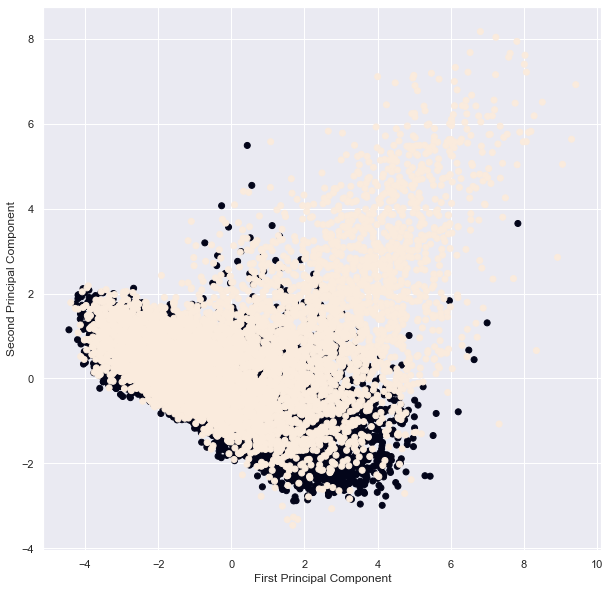

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c=data['class'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')  

## LDA

In [20]:
data=pd.read_csv("https://raw.githubusercontent.com/RishikeshGovind/gamma_radiation_detection/main/telescope_data.csv")
data.head()                 

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [21]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [22]:
from sklearn.preprocessing import LabelEncoder

X = data.loc[:,'fLength':'fDist']

y=np.array(data['class'])
y



array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

In [23]:
#applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA()
X_lda = lda.fit_transform(X, y)

In [24]:
X_lda

array([[-0.2568096 ],
       [-0.67204003],
       [ 3.49572287],
       ...,
       [ 0.15824298],
       [ 3.6933639 ],
       [ 3.60500821]])

**Presence of only two classes reduces our data to single dimension, ie, 1-d array, which cannot be plotted in two figure, while can be plooted on number line. This 1-d plotting doezn't give us much inferences about the data, and thus seems to be useless**

In [25]:
data['class']=data['class'].map({'g':0,'h':1})
y=data['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
19015    1
19016    1
19017    1
19018    1
19019    1
Name: class, Length: 19020, dtype: int64

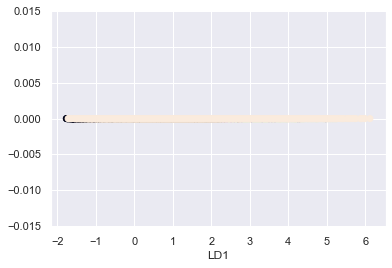

In [26]:
##plotting 1-d array by keeping y=0
plt.xlabel('LD1')

plt.scatter(X_lda[:,0], y=[0]*19020, c=y)

**LinearDiscriminantAnalysis can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes. The dimension of the output is necessarily less than the number of classes, so this is, in general, a rather strong dimensionality reduction, and only makes sense in a multiclass setting.
This is evident from the above plot, since both data are mixed and are not seprable**